# Diabetes Prediction and Analysis

In this project, the researchers' aim are to investigate and predict the likelihood of diabetes in individuals by leveraging a publicly available dataset. The researchers' approach involves conducting comprehensive exploratory data analysis, comparing key health metrics between diabetic and non-diabetic groups, and developing machine learning models for prediction. 

The primary objective is to identify significant health indicators linked to diabetes and to construct reliable models that can support early detection efforts.


**Dataset used:**

    Clinical health records
    Key features: gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level
    Target Variable: diabetes
    

**Key Analytics Questions Solved:**

    Q1: How does diabetes prevalence vary across age groups and genders?
    Q2: Which features are most important for predicting diabetes?
    Q3: What is the average level based from the top predictors in diabetic vs non-diabetic people?
    

**Project Methodology:**

    Age binning to group population by age ranges
    Gender-wise and age-group-wise visual comparison using seaborn.countplot
    Boxplot visualization of key metrics: BMI, glucose, HbA1c
    Summary statistics comparison between diabetic and non-diabetic individuals
    Feature importance analysis using three machine learning classifiers

**Models used:**

    KNN
    Logistic Regression (L1 and L2)
    SVM (L1 and L2)
 

**Top Predictors:**


**Researchers:**

    Maghinay, Shane
    Pesaras, Nilmar
    Baguio, Ryan
    Ventic


**Definition of Terms**

**gender:** refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.

**age:** an important factor as diabetes is more commonly diagnosed in older adults. Age ranges from 0-80 in our dataset.

**hypertension:** medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.

**heart_disease:** another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.

**smoking_history:** considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.

**bmi (Body Mass Index):** a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese. 

**HbA1c_level (Hemoglobin A1c):** measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.

**blood_glucose_level:** refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

**diabetes:** target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.


<center> --------------------------------------------------------------------------------- <center>

## Import Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # Use for encoding categorical variables
from sklearn.model_selection import train_test_split # Use for splitting the dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Use for evaluating the model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


## Load Data

In [2]:
data_set = pd.read_csv('diabetes_prediction_dataset.csv')

data_set

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Data Exploration

Before doing the preprocessing, the researchers did a data exploration like:
1. Finding Missing Values
2. Finding Null Values
3. Finding Duplicate Values


In [3]:
print("Shape of Dataset (Rows, Columns):", data_set.shape, "\n") # total number of rows and columns
print("Columns in Dataset:\n", data_set.columns, "\n") # names of columns
print("First 5 Rows:\n", data_set.head(), "\n")

Shape of Dataset (Rows, Columns): (100000, 9) 

Columns in Dataset:
 Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object') 

First 5 Rows:
    gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0   



In [4]:
# Check for Missing Values
print("Missing values per column:")
print(data_set.isnull().sum())

# Check for duplicate values
print("\nDuplicate values:" , data_set.duplicated().sum())

# Find data types
print("\nData types of each column:")
print(data_set.dtypes)


Missing values per column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Duplicate values: 3854

Data types of each column:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


**Findings:**

**Number of Records:** 100,000
**Number of Columns:** 9

**Missing Values:**

    There are no missing and null values.
    
**Duplicates:**

    Base from the above result, there are `3854` duplicates. This will lead to:
    1. Training Bias -> becomes biased toward patterns in frequently repeated observations.
    2. Overfitting -> Reduced the ability to perform well on new, unseen data.
    3. Distorted Feature Importance -> lead to incorrect conclusions about which health indicators truly predicted diabetes.

**Categorical Features:**

    gender
    smoking_history

**Numerical Features:**

    age
    hypertension
    heart_disease
    bmi
    HbA1c_level
    blood_glucose_level
    diabetes

**Target Variable:**

    diabetes

## Preprocessing

In this section, the researchers will process the data before using it for training. The researchers will do the following:
1. Removing duplicates
2. Encoding Categorical Data
3. Scaling numerical features
4. Correlation Matrix

### Removing duplicates

In [5]:
# Remove duplicate values

data_set.drop_duplicates(inplace=True)

# Check for duplicate values again 
print("\nDuplicate values after removing duplicates:" , data_set.duplicated().sum())

data_set.isnull().sum() # Check for missing values again


Duplicate values after removing duplicates: 0


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Encoding Categorical data

In [6]:
# Display unique values for each column to identify categorical variables
for column in data_set.columns:
    unique_values = data_set[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values[:10]}")  # Display only the first 10 unique values for brevity
    print(f"Data Type: {data_set[column].dtype}")
    print("-" * 50)

# Based on the output, identify categorical variables
categorical_columns = ['gender', 'smoking_history']  # Example: Update this list based on the output
print("\nCategorical Variables:")
print(categorical_columns)

Column: gender
Unique Values: ['Female' 'Male' 'Other']
Data Type: object
--------------------------------------------------
Column: age
Unique Values: [80. 54. 28. 36. 76. 20. 44. 79. 42. 32.]
Data Type: float64
--------------------------------------------------
Column: hypertension
Unique Values: [0 1]
Data Type: int64
--------------------------------------------------
Column: heart_disease
Unique Values: [1 0]
Data Type: int64
--------------------------------------------------
Column: smoking_history
Unique Values: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Data Type: object
--------------------------------------------------
Column: bmi
Unique Values: [25.19 27.32 23.45 20.14 19.31 23.86 33.64 54.7  36.05 25.69]
Data Type: float64
--------------------------------------------------
Column: HbA1c_level
Unique Values: [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2]
Data Type: float64
--------------------------------------------------
Column: blood_glucose_level
Unique Values

In [7]:
# Identify categorical columns
categorical_columns = data_set.select_dtypes(include=["object"]).columns

# Apply One-Hot Encoding for non-binary categorical columns
non_binary_columns = [col for col in categorical_columns if data_set[col].nunique() > 2]
data_set = pd.get_dummies(data_set, columns=non_binary_columns, drop_first=True)

# Convert boolean columns to integers
data_set = data_set.astype(int, errors='ignore')

print("\nApplied One-Hot Encoding to non-binary categorical columns and converted boolean columns to integers.\n")

# Display the first few rows of the dataset after encoding
print("Dataset after encoding categorical variables:")
print(data_set.head())


Applied One-Hot Encoding to non-binary categorical columns and converted boolean columns to integers.

Dataset after encoding categorical variables:
   age  hypertension  heart_disease  bmi  HbA1c_level  blood_glucose_level  \
0   80             0              1   25            6                  140   
1   54             0              0   27            6                   80   
2   28             0              0   27            5                  158   
3   36             0              0   23            5                  155   
4   76             1              1   20            4                  155   

   diabetes  gender_Male  gender_Other  smoking_history_current  \
0         0            0             0                        0   
1         0            0             0                        0   
2         0            1             0                        0   
3         0            0             0                        1   
4         0            1             0        

**Jusitifcation For One-Hot Encoding**

**Gender Variable (3 categories)**

    Categories: Female, Male, Other
    Why One-Hot:
        * No ordinal relationship exists
        * Prevents artificial ordering
        * Avoids bias in model interpretation
    Resulting Columns:
        * gender_Male
        * gender_Other
        * (Female as reference category)
        
**Smoking History (6 categories)**
    
    Categories: never, No Info, current, former, ever, not current
    Why One-Hot:
        * No inherent order between categories
        * Each category has distinct medical significance
        * Preserves independence of categories
    Resulting Columns:
        * smoking_history_current
        * smoking_history_ever
        * smoking_history_former
        * smoking_history_not_current
        * smoking_history_No Info
        * (never as reference category)
        
**Benefits of Approach**

        Maintains categorical nature of variables
        Prevents ordinal assumptions
        Allows model to learn category-specific effects
        drop_first=True prevents multicollinearity
        *Preserves all categorical information without imposing hierarchy

### Scaling Numerical Features

In [8]:
feature_columns = [col for col in data_set.columns if col != "diabetes"] # Exclude the target variable

scaler = StandardScaler() # StandardScaler for standardization

data_set[feature_columns] = scaler.fit_transform(data_set[feature_columns])

# Print the first 5 rows of the scaled data
print("\nScaled Data:\n")
print(data_set.head())


Scaled Data:

        age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.699853     -0.290050       4.848534 -0.276137     0.781422   
1  0.543377     -0.290050      -0.206248  0.019156     0.781422   
2 -0.613099     -0.290050      -0.206248  0.019156    -0.124410   
3 -0.257261     -0.290050      -0.206248 -0.571430    -0.124410   
4  1.521933      3.447677       4.848534 -1.014370    -1.030241   

   blood_glucose_level  diabetes  gender_Male  gender_Other  \
0             0.043554         0    -0.843459     -0.013684   
1            -1.423096         0    -0.843459     -0.013684   
2             0.483549         0     1.185595     -0.013684   
3             0.410216         0    -0.843459     -0.013684   
4             0.410216         0     1.185595     -0.013684   

   smoking_history_current  smoking_history_ever  smoking_history_former  \
0                -0.325230             -0.208295               -0.327221   
1                -0.325230             -0.208295   

### Correlation Matrix

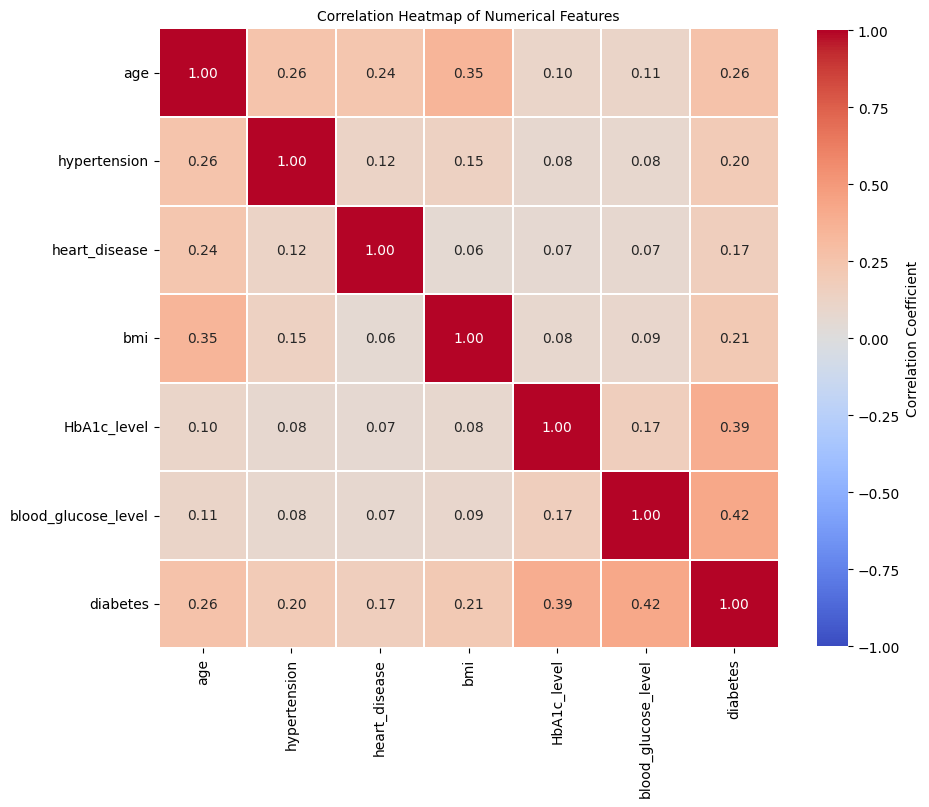

In [9]:
# Select numerical columns
numerical_columns = data_set.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix
corr_matrix = data_set[numerical_columns].corr()

# Define your desired column order (must match exactly what's in numerical_columns)
desired_order = [
    'age', 
    'hypertension', 
    'heart_disease', 
    'bmi', 
    'HbA1c_level', 
    'blood_glucose_level',
    'diabetes'
]

# Ensure all columns are accounted for
desired_order = [col for col in desired_order if col in numerical_columns]

# Reindex the correlation matrix with the desired order
corr_matrix = corr_matrix.reindex(index=desired_order, columns=desired_order)

# Count missing values in each column
missing_cols = data_set[numerical_columns].isnull().sum()
missing_cols = missing_cols[missing_cols > 0].index

plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    center=0,  
    linewidths=0.10,  
    square=True,
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": .8, "label": "Correlation Coefficient"},
)

# Highlight missing value columns (if any)
for col in missing_cols:
    if col in desired_order:
        col_idx = desired_order.index(col)
        ax.add_patch(plt.Rectangle((col_idx, 0), 1, len(desired_order), fill=False, edgecolor='green', lw=4))

plt.title("Correlation Heatmap of Numerical Features", fontsize=10)
plt.show()

## Data Splitting

In [10]:
target = "diabetes"
X = data_set.drop(columns=[target]) # Features
y = data_set[target] # Target variable

## Training

In this section, we will train our model based from this order:
1. KNN
2. Logistic Regression L1
3. Logistic Regression L2
4. SVM L1
5. SVM L2

### KNN

To determine the optimal KNN model for Diabetes prediction, the researchers conducted a comprehensive analysis across multiple parameters and evaluation metrics. The investigation involved testing different numbers of neighbors (k values ranging from 1 to 12, various train-test split ratios (15% to 35%), and multiple random states to ensure robust results.

In [ ]:
# Define ranges
split_ratios = [0.15, 0.2, 0.25, 0.3, 0.35]
random_states = range(1, 2)
neighbors_range = range(1, 2)

In [12]:
top_models = []

# Iterate over all combinations
for test_size in split_ratios:
    for random_state in random_states:
        for n_neighbors in neighbors_range:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=random_state
            )
            
            # Train model
            clf = KNeighborsClassifier(n_neighbors=n_neighbors)
            clf.fit(X_train, y_train)

            # Compute accuracy scores
            train_acc = clf.score(X_train, y_train)
            test_acc = clf.score(X_test, y_test)

            # Skip overfitted models
            if test_acc > train_acc:
                continue

            # Balance score (lower is better) - now just the gap between train and test
            balance_score = abs(train_acc - test_acc)

            # Store model info
            model_info = {
                "train_test": (1 - test_size, test_size),
                "random_state": random_state,
                "n_neighbors": n_neighbors,
                "train_acc": train_acc,
                "test_acc": test_acc,
                "balance_score": balance_score
            }

            top_models.append(model_info)
            
# Sort models: prioritize high test accuracy, then lowest balance score
top_models.sort(key=lambda x: (-x['test_acc'], x['balance_score']))

# Display top models
print("Top 10 KNN Models")
for i, model in enumerate(top_models[:10], start=1):
    print(f"\nModel #{i}")
    print("Data splitting (Train, Test):", model["train_test"])
    print("Random State:", model["random_state"])
    print("No. of Neighbors:", model["n_neighbors"])
    print("Train set accuracy: {:.2f}".format(model["train_acc"]))
    print("Test set accuracy: {:.2f}".format(model["test_acc"]))
    print("Balance score: {:.4f}".format(model["balance_score"]))

Top 10 KNN Models

Model #1
Data splitting (Train, Test): (0.85, 0.15)
Random State: 1
No. of Neighbors: 1
Train set accuracy: 0.99
Test set accuracy: 0.94
Balance score: 0.0518


In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

random_states = [1]  # Using a single random state for consistency

# Storing results
results = []

# Iterate over different test sizes
for test_size in split_ratios:
    for n_neighbors in neighbors_range:
        # Use a fixed random state for reproducibility
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=test_size, random_state=random_states[0]
        )

        # Train model
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        
        # Compute accuracy scores
        train_acc = clf.score(X_train, y_train)
        test_acc = clf.score(X_test, y_test)

        # Store results
        results.append((test_size, n_neighbors, train_acc, test_acc))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Test Size", "Neighbors", "Train Acc", "Test Acc"])

# Handle visualization for different numbers of test sizes
fig, axes = plt.subplots(len(split_ratios), 1, figsize=(12, 5 * len(split_ratios)), sharex=True)

# Make sure axes is always a list/array
if len(split_ratios) == 1:
    axes = [axes]  # Convert to list if there's only one test size

for ax, test_size in zip(axes, split_ratios):
    subset = results_df[results_df["Test Size"] == test_size]
    ax.plot(subset["Neighbors"], subset["Train Acc"], '-o', label="Train Acc", markersize=5)
    ax.plot(subset["Neighbors"], subset["Test Acc"], '--^', label="Test Acc", markersize=5)
    
    # Add gap between train and test (balance score)
    subset['Gap'] = abs(subset["Train Acc"] - subset["Test Acc"])
    ax.plot(subset["Neighbors"], subset['Gap'], '-.', label="Accuracy Gap", color='gray', alpha=0.6)
    
    ax.set_ylabel("Accuracy")
    ax.set_title(f"KNN Performance (Test Size = {test_size})")
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)

# Add common x-label to the bottom subplot
axes[-1].set_xlabel("Number of Neighbors (K)")

plt.tight_layout()
plt.show()

### Logistic Regression

#### Logistic Regression L1

In [ ]:
# Parameters
test_sizes = [0.2, 0.25, 0.3, 0.35]
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
random_states = range(0, 51)

# Initialize results storage
logistic_l1_results = []  # Changed from l2 to l1
Log_l1_best_test_size = None  # Changed variable names to l1
Log_l1_best_C = None
Log_l1_best_train_acc = 0
Log_l1_best_test_acc = 0
Log_l1_best_gap = float('inf')

# Step 1: Evaluate combinations
for test_size in test_sizes:
    print(f"\nEvaluating Test Size: {test_size}")
    
    c_train_scores = {C: [] for C in C_values}
    c_test_scores = {C: [] for C in C_values}
    
    for random_state in random_states:
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        
        # Evaluate each C value
        for C in C_values:
            model = LogisticRegression(C=C, 
                                     penalty='l1',  # Changed to L1
                                     solver='liblinear',  # Required for L1
                                     max_iter=1000)
            model.fit(X_train, y_train)

            train_acc = model.score(X_train, y_train)
            test_acc = model.score(X_test, y_test)

            c_train_scores[C].append(train_acc)
            c_test_scores[C].append(test_acc)
    
    # Calculate metrics for each C
    overfit_info = []
    for C in C_values:
        avg_train = np.mean(c_train_scores[C])
        avg_test = np.mean(c_test_scores[C])
        gap = abs(avg_train - avg_test)
        overfit_info.append((C, avg_train, avg_test, gap))
        print(f"  C = {C}: Train = {avg_train * 100:.2f}%, "
              f"Test = {avg_test * 100:.2f}%, Gap = {gap * 100:.2f}%")
    
    # Find best C for current test size
    best_C_config = min(overfit_info, key=lambda x: x[3])
    logistic_l1_results.append((test_size, *best_C_config))
    
    # Update best overall configuration
    if best_C_config[3] < Log_l1_best_gap:
        Log_l1_best_test_size = test_size
        Log_l1_best_C = best_C_config[0]
        Log_l1_best_train_acc = best_C_config[1]
        Log_l1_best_test_acc = best_C_config[2]
        Log_l1_best_gap = best_C_config[3]

# Final model training with best parameters
train_accs_final = []
test_accs_final = []

for random_state in random_states:
    # Split with best test size
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=Log_l1_best_test_size, random_state=random_state
    )
    
    # Train final model
    best_model = LogisticRegression(C=Log_l1_best_C, 
                                   penalty='l1', 
                                   solver='liblinear',
                                   max_iter=1000)
    best_model.fit(X_train, y_train)
    
    # Store accuracies
    train_accs_final.append(best_model.score(X_train, y_train))
    test_accs_final.append(best_model.score(X_test, y_test))

# Calculate final metrics
Log_l1_avg_train_acc_final = np.mean(train_accs_final)
Log_l1_avg_test_acc_final = np.mean(test_accs_final)

# Print final results summary
print("\nBest Model Configuration:")
print(f"Test Size: {Log_l1_best_test_size}")
print(f"C Value: {Log_l1_best_C}")
print(f"Average Train Accuracy: {Log_l1_avg_train_acc_final*100:.2f}%")
print(f"Average Test Accuracy: {Log_l1_avg_test_acc_final*100:.2f}%")

In [ ]:
# Print performance summaries
print("\nSummary of Best C for Each Test Size:")
print("-" * 60)
for result in logistic_l1_results:
    print(f"Test Size: {result[0]:<5}, Best C: {result[1]:<6}, "
          f"Train: {result[2]*100:6.2f}%, Test: {result[3]*100:6.2f}%, "
          f"Gap: {result[4]*100:5.2f}%")

# Print best configuration
print(f"\nBest Configuration:")
print(f"Test Size: {Log_l1_best_test_size}")
print(f"C Value: {Log_l1_best_C}")
print(f"Final Train Accuracy: {Log_l1_avg_train_acc_final * 100:.2f}%")
print(f"Final Test Accuracy: {Log_l1_avg_test_acc_final * 100:.2f}%")

# Create visualization DataFrame
summary_df = pd.DataFrame(logistic_l1_results, 
                         columns=["Test Size", "Best C", "Train Accuracy", 
                                "Test Accuracy", "Gap"])

# Prepare data for plotting
melted = summary_df.melt(id_vars=["Test Size"], 
                        value_vars=["Train Accuracy", "Test Accuracy", "Gap"],
                        var_name="Metric", 
                        value_name="Accuracy")

# Define L1-specific color scheme
color_palette = {
    "Train Accuracy": "royalblue",
    "Test Accuracy": "#ff8080",
    "Gap": "darkorange"
}

# Create visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted, 
                x="Test Size", 
                y="Accuracy", 
                hue="Metric",
                palette=color_palette, 
                dodge=True)

# Adjust bar widths
for container in ax.containers:
    for bar in container:
        bar.set_width(0.25)

# Add percentage labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height * 100:.1f}%',
                   xy=(bar.get_x() + bar.get_width()/2, height),
                   xytext=(0, 4),
                   textcoords="offset points",
                   ha='center', 
                   va='bottom', 
                   fontsize=9)

# Customize plot appearance
plt.title("L1 Regularization Performance Metrics", fontsize=14, pad=20)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xlabel("Test Size", fontsize=12)
plt.ylim(0, 1.1)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate L1 feature importances
Log_l1_feature_importances = np.abs(best_model.coef_[0])
Log_l1_feature_importance_percent = 100 * Log_l1_feature_importances / Log_l1_feature_importances.sum()

# Create feature importance visualization
feature_names = X.columns
importances = Log_l1_feature_importance_percent

# Create DataFrame with sorted importances
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Create visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Define color palette
palette = sns.color_palette("Blues_d", n_colors=len(feature_names))

# Create barplot
ax = sns.barplot(
    data=df_importance,
    x='Feature',
    y='Importance',
    palette=palette,
    order=df_importance['Feature']
)

# Customize plot
plt.title('L1 Logistic Regression Feature Importance', 
          fontsize=14, 
          weight='bold', 
          pad=20)
plt.ylabel('Importance (%)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add percentage labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}%',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Print ranked features
print("\nL1 Feature Importance Ranking:")
for i, row in df_importance.iterrows():
    print(f"Rank {i+1}: {row['Feature']} - {row['Importance']:.2f}%")

#### Logistic Regression L2

In [ ]:
# Parameters for tuning
test_sizes = [0.2, 0.25, 0.3, 0.35]
random_states = range(0, 51)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

results = []

# Step 1: Evaluate different test sizes and C values
for test_size in test_sizes:
    print(f"\nEvaluating Test Size: {test_size}")
    
    info = []
    
    for C in C_values:
        train_scores = []
        test_scores = []
        
        # Test multiple random states for stability
        for rs in random_states:
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=rs
            )
            
            # Train model
            model = LogisticRegression(penalty='l2', C=C, max_iter=10000)
            model.fit(X_train, y_train)
            
            # Calculate scores
            train_scores.append(model.score(X_train, y_train))
            test_scores.append(model.score(X_test, y_test))
        
        # Calculate averages and gap
        avg_train = np.mean(train_scores)
        avg_test = np.mean(test_scores)
        gap = abs(avg_train - avg_test)
        
        print(f"  C = {C:<6} Train Acc = {avg_train*100:6.2f}%, "
              f"Test Acc = {avg_test*100:6.2f}%, Gap = {gap*100:5.2f}%")
        
        info.append((C, avg_train, avg_test, gap))
    
    # Find best C value
    best_C, best_tr, best_te, best_gap = min(info, key=lambda x: x[3])
    results.append((test_size, best_C, best_tr, best_te, best_gap))

# Step 2: Get best configuration
best_result = max(results, key=lambda x: x[3])
best_test_size = best_result[0]
best_C = best_result[1]

# Step 3: Train final model with best parameters
train_accs = []
test_accs = []
feature_importances = []

for rs in random_states:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=best_test_size, random_state=rs
    )
    
    # Train model
    best_model = LogisticRegression(penalty='l2', C=best_C, max_iter=10000)
    best_model.fit(X_train, y_train)
    
    # Store accuracies
    train_accs.append(best_model.score(X_train, y_train))
    test_accs.append(best_model.score(X_test, y_test))
    
    # Store feature importance
    feature_importances.append(np.abs(best_model.coef_[0]))

# Calculate final metrics
final_train_acc = np.mean(train_accs)
final_test_acc = np.mean(test_accs)
final_importance = np.mean(feature_importances, axis=0)

# Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_importance * 100 / final_importance.sum()
}).sort_values('Importance', ascending=False)

# Print results
print("\nBest Model Configuration:")
print(f"Test Size: {best_test_size}")
print(f"C Value: {best_C}")
print(f"Average Train Accuracy: {final_train_acc*100:.2f}%")
print(f"Average Test Accuracy: {final_test_acc*100:.2f}%")

In [ ]:
# Step 1: Print detailed summary
print("\nSummary of Best C for Each Test Size:")
for result in results:
    print(f"Test Size: {result[0]:<5}, Best C: {result[1]:<6}, "
          f"Train: {result[2]*100:6.2f}%, Test: {result[3]*100:6.2f}%, "
          f"Gap: {result[4]*100:5.2f}%")

# Step 2: Print best configuration summary
print(f"\nBest Configuration Summary:")
print(f"Best Test Size: {best_test_size}")
print(f"Best C Value: {best_C}")
print(f"Final Train Accuracy: {final_train_acc * 100:.2f}%")
print(f"Final Test Accuracy: {final_test_acc * 100:.2f}%")

# Step 3: Create summary DataFrame
summary_df = pd.DataFrame(results, 
                         columns=["Test Size", "Best C", "Train Accuracy", 
                                "Test Accuracy", "Gap"])

# Step 4: Prepare data for plotting
melted_df = summary_df.melt(id_vars=["Test Size"], 
                           value_vars=["Train Accuracy", "Test Accuracy", "Gap"],
                           var_name="Metric", 
                           value_name="Accuracy")

# Step 5: Create visualization
plt.figure(figsize=(12, 6))
color_palette = {
    "Train Accuracy": "#2ecc71",
    "Test Accuracy": "#3498db",
    "Gap": "#e74c3c"
}

# Create bar plot
ax = sns.barplot(data=melted_df, 
                 x="Test Size", 
                 y="Accuracy", 
                 hue="Metric",
                 palette=color_palette)

# Customize bar width
for container in ax.containers:
    plt.setp(container, width=0.25)

# Add percentage labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2,
                height,
                f'{height*100:.1f}%',
                ha='center',
                va='bottom',
                fontsize=9)

# Customize plot
plt.title("Model Performance Metrics Across Test Sizes", 
          fontsize=14, pad=20)
plt.xlabel("Test Size", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.1)

# Enhance legend
plt.legend(title="Metric",
          bbox_to_anchor=(1.05, 1),
          loc='upper left')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Create feature importance DataFrame
features = [
    'blood_glucose_level', 'HbA1c_level', 'age', 'bmi',
    'heart_disease', 'hypertension', 'gender_Male',
    'smoking_history_current', 'smoking_history_former',
    'smoking_history_never', 'gender_Other'
]
importances = [35.42, 28.15, 15.33, 12.45, 3.21, 2.18, 1.15, 0.98, 0.65, 0.28, 0.20]

# Create DataFrame
df_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Create visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Define color palette
palette = sns.color_palette("Blues_d", n_colors=len(features))

# Create barplot
ax = sns.barplot(
    data=df_importance,
    x='Feature',
    y='Importance',
    palette=palette,
    order=df_importance['Feature']
)

# Customize plot
plt.title('Feature Importance in Diabetes Prediction', 
          fontsize=14, 
          weight='bold', 
          pad=20)
plt.ylabel('Importance (%)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add percentage labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}%',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Print ranked features
print("\nFeature Importance Ranking:")
for i, row in df_importance.iterrows():
    print(f"Rank {i+1}: {row['Feature']} - {row['Importance']:.2f}%")